# Reconocimiento de las señales de tráfico

In [2]:
import tensorflow as tf
import os
import skimage.data as imd
import numpy as np

In [3]:
#Vamos a crear una función para leer un dataset con varias carpetas
#data_directory será nuestra carpeta raiz, ya que tenemos varias subcarpetas que deberemos recorrer
def load_ml_data(data_directory): 
    dirs = [d for d in os.listdir(data_directory) #que liste todas las subcarpetas dentro de la raiz... 
            if os.path.isdir(os.path.join(data_directory,d))] #...si esas carpetas se encuenran dentro de la raiz
    
    labels = [] #lista de etiquetas para las fotos
    images = [] #lista para las imagenes
    for d in dirs: #recorremos los subdirectorios
        
        label_dir = os.path.join(data_directory, d) #creamos el path (ej:/datasets/belgian/training/00001)
        file_names = [os.path.join(label_dir, f) #recorremos todos los archivos
                     for f in os.listdir(label_dir) #para todas las carepts de label_dir(0001,0002,...)
                     if f.endswith(".ppm")] #si los archivos terminan en .ppm
        
        #recorrer las imagenes de cada subdirectorio
        for f in file_names:
            images.append(imd.imread(f)) #cargamos las imagenes en el formato skimage(equivalente al skilearn pero de imagenes)
            labels.append(int(d)) #añadimos las etiquetas a la lista labels[]
        
    return images, labels

In [4]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training") #sería "../datasets/belgian/Training/"
test_data_dir = os.path.join(main_dir, "Testing") #sería "../datasets/belgian/Testing/"

In [23]:
images, labels = load_ml_data(train_data_dir)

In [24]:
images = np.array(images) #pasamos la lista images a array con numpy

In [25]:
labels = np.array(labels) #pasamos la lista labels a array con numpy

In [26]:
images.ndim #tenemos 1 dimension(una columna)

1

In [27]:
images.size #4575 filas(fotos)

4575

In [28]:
images[0] 
#primera foto en formato array (0 es negro y 255 blanco) cada [ canal Rojo, canal Verde,  canal Azul] 
#es un solo pixel combinación de esos 3 números(RGB)

Array([[[ 74,  64,  43],
        [ 74,  65,  43],
        [ 76,  69,  47],
        ...,
        [ 76,  64,  44],
        [ 74,  63,  42],
        [ 73,  62,  43]],

       [[ 69,  58,  38],
        [ 71,  61,  41],
        [ 74,  66,  46],
        ...,
        [ 76,  64,  43],
        [ 74,  62,  41],
        [ 72,  60,  40]],

       [[ 69,  57,  39],
        [ 71,  60,  43],
        [ 72,  62,  44],
        ...,
        [ 76,  63,  41],
        [ 74,  61,  40],
        [ 72,  60,  38]],

       ...,

       [[129, 110,  74],
        [119, 106,  68],
        [123, 104,  68],
        ...,
        [ 68,  59,  37],
        [ 59,  50,  31],
        [ 53,  42,  25]],

       [[121, 105,  68],
        [114, 103,  65],
        [120, 100,  65],
        ...,
        [ 69,  58,  37],
        [ 63,  54,  34],
        [ 59,  48,  31]],

       [[112,  98,  61],
        [109,  99,  61],
        [115,  96,  61],
        ...,
        [ 69,  58,  38],
        [ 68,  59,  40],
        [ 66,  55,  38]]

In [11]:
labels.ndim

1

In [12]:
labels.size

4575

In [13]:
len(set(labels)) 
#con set nos contabiliza 1 si esta se encuentra repetida(etiquetas únicas). 
#Por lo tanto tenemos 62 etiquetas diferetnes

62

In [14]:
images.flags #para ver como ha ido la carga en nuestro PC

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [15]:
images.itemsize #vemos que son elementos en 8 bits

8

In [16]:
images.nbytes #bits totales

36600

In [17]:
images.nbytes/images.itemsize #si dividimos ambos obtenemos los bits de informacion

4575.0

In [18]:
import matplotlib.pyplot as plt

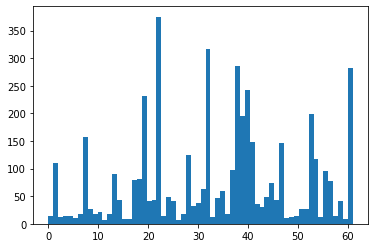

In [29]:
plt.hist(labels, len(set(labels))) #número de fotos por cada tipo de señal de tráfico
plt.show()

**Vamos a obtener imagenes aleatorias del dataset para ver como son:**

In [20]:
import random

In [30]:
rand_signs = random.sample(range(0, len(labels)), 6) #vamos a buscar una muestra aleatoria de 6 señales
rand_signs

[2506, 2274, 4426, 426, 1198, 4029]

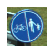

Forma:(110, 112, 3), min:5, max:255


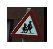

Forma:(134, 151, 3), min:0, max:218


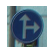

Forma:(83, 81, 3), min:17, max:198


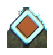

Forma:(74, 71, 3), min:0, max:255


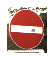

Forma:(202, 172, 3), min:2, max:255


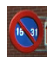

Forma:(106, 83, 3), min:7, max:255


In [39]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

* **Ej:** *Forma:(106, 83, 3), min:7, max:255*  **--->**  
                (106px alto, 83px ancho, 3 canales de color). 7 numero de color más bajo(cerca del negro. 255 color más alto(255 es el blanco)

**Una vez hemos visto qué pinta tienen las imagenes. Vamos a imprimir una señal de cada tipo:**

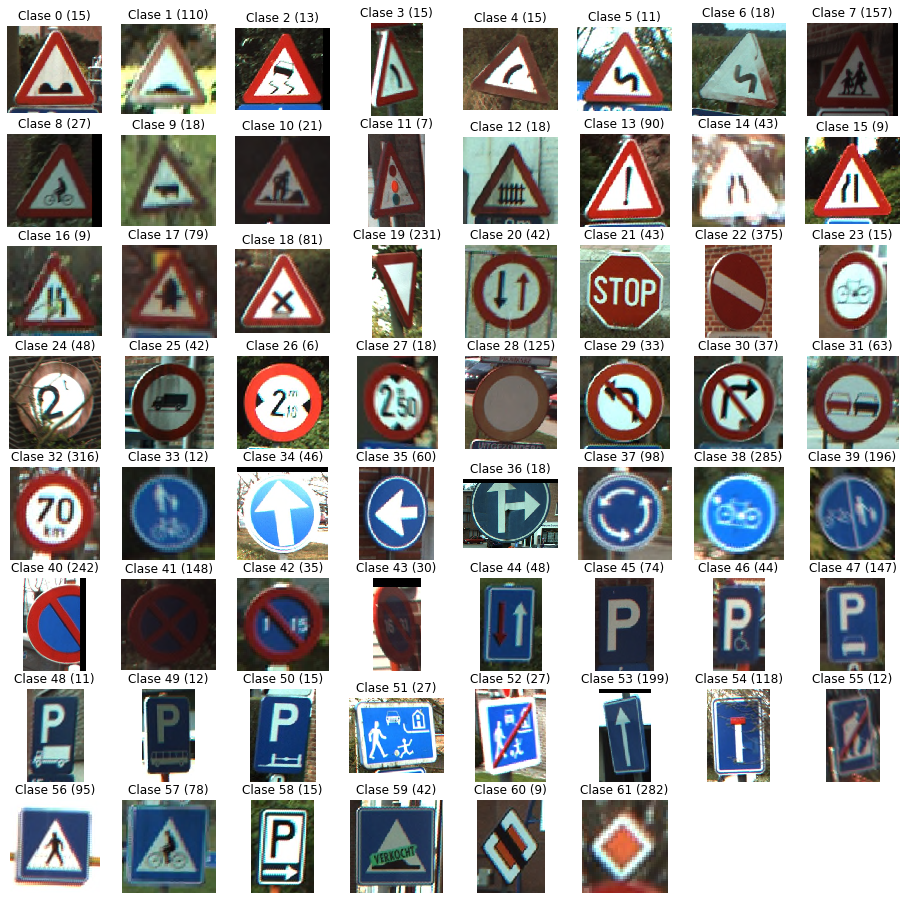

In [41]:
unique_labels = set(labels) #pillamos las labels únicas(etiquetas únicas)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels: #para cada una de las imagenes únicas
    temp_im = images[list(labels).index(label)] #nos quedamos con la imagen que está en la posición del index(fila)
    plt.subplot(8,8, i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label))) #que nos indicque la cantidad de fotos que hay en esta señal
    i +=1
    plt.imshow(temp_im)
plt.show()

In [23]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imágenes no todas son del mismo tamaño
* Hay 62 clases de imágenes (desde la 0 hasta la 61)
* La distribución de señales de tráfico no es uniforme (algunas salen más veces que otras)

**Vemos que las fotos tienen diferentes niveles de sobrexposición(unas muy claras, otras mas oscuras). Por ello antes de meterle los datos a la red neuronal debemos:** 
* Convertirlas a una escala de grises.
* Mismo tamaño el mismo tamaño.

In [47]:
from skimage import transform #transform hace una trasformación lineal de las fotos

### **1- Las ponemos al mismo tamaño.** 
Para ello ponemos todas del tamaño de la más pequeña. Aunque veremos que la más pequña es demasiado pequeña(22x20px) así que las pondremos a 30x30px

In [43]:
w = 9999 #width
h = 9999 #hight
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] < w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 22x20


In [44]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [45]:
images30[0]

array([[[0.27507407, 0.23320261, 0.16169935],
        [0.26471242, 0.22549673, 0.15823529],
        [0.2921024 , 0.25398693, 0.18339869],
        ...,
        [0.22234205, 0.21183007, 0.14014161],
        [0.27660131, 0.24797386, 0.16562092],
        [0.29146187, 0.24705882, 0.16124183]],

       [[0.27248366, 0.21744444, 0.15398039],
        [0.2682549 , 0.22429412, 0.1645098 ],
        [0.28856209, 0.24980392, 0.18313725],
        ...,
        [0.21663399, 0.20601307, 0.13771242],
        [0.2572549 , 0.23117647, 0.15137255],
        [0.28869935, 0.25444444, 0.16352941]],

       [[0.30077342, 0.24921569, 0.17478214],
        [0.30202614, 0.25888889, 0.18503268],
        [0.30659041, 0.26372549, 0.18567538],
        ...,
        [0.25027233, 0.22674292, 0.14934641],
        [0.27754902, 0.24428105, 0.1619281 ],
        [0.27020697, 0.23491285, 0.14575163]],

       ...,

       [[0.52988017, 0.42980392, 0.28189542],
        [0.46591503, 0.37094771, 0.24960784],
        [0.46410675, 0

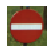

Forma:(30, 30, 3), min:0.07647058823529407, max:0.9264705882352942


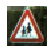

Forma:(30, 30, 3), min:0.016666666666666555, max:0.9950980392156861


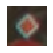

Forma:(30, 30, 3), min:0.10918300653594769, max:0.6637908496732026


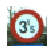

Forma:(30, 30, 3), min:0.06672222222222228, max:1.0


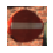

Forma:(30, 30, 3), min:0.06666666666666667, max:0.9882352941176471


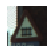

Forma:(30, 30, 3), min:0.06917647058823506, max:0.9840392156862744


In [48]:
#volvemos a pintar 6 imagenes aleatorias pero ahora de images30 (código reutilizado de antes)
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

### **2- Las ponemos en escala de grises.**

In [50]:
from skimage.color import rgb2gray #con esta libreria transforma imagenes RGB a escala de grises

In [51]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

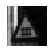

Forma:(30, 30), min:0.08395443137254903, max:0.9296807385620914


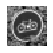

Forma:(30, 30), min:0.19776042483660197, max:0.9128941742919379


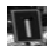

Forma:(30, 30), min:0.08367581699346402, max:0.7787012594771242


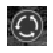

Forma:(30, 30), min:0.09400768246187369, max:0.980486653050109


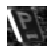

Forma:(30, 30), min:0.1225326339869276, max:0.9923265098039217


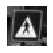

Forma:(30, 30), min:0.05664552222222218, max:0.5551644689542484


In [59]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray") #sino ponemos cmap=gray, por defecto usa un mapa de calor
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

## **Construimos la arquitectura de nuestra red neuronal usando TEnsorFlow**
**(ESTO ES PARA TENSORFLOW 1.0, SI TENEMOS LA 2.0 NO VALE)**

In [53]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.


In [54]:
images_flat

<tf.Tensor 'Flatten/flatten/Reshape:0' shape=(?, 900) dtype=float32>

In [55]:
logits

<tf.Tensor 'fully_connected/Relu:0' shape=(?, 62) dtype=float32>

In [56]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [57]:
final_pred

<tf.Tensor 'ArgMax:0' shape=(?,) dtype=int64>

In [58]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(601):
    
    _, accuracy_val = sess.run([train_opt, accuracy],
                              feed_dict= {
                                  x: images30,
                                  y: list(labels)
                              })
    #_, loss_val = sess.run([train_opt, loss],
    #                          feed_dict= {
    #                              x: images30,
    #                              y: list(labels)
    #                          })
    if i%50 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        #print("Pérdidas:", loss_val)
    #print("Fin del Ecpoh ", i)

EPOCH 0
Eficacia:  26.999563
EPOCH 50
Eficacia:  33.212677
EPOCH 100
Eficacia:  33.276066
EPOCH 150
Eficacia:  33.24962
EPOCH 200
Eficacia:  33.309288
EPOCH 250
Eficacia:  33.241966
EPOCH 300
Eficacia:  33.216614
EPOCH 350
Eficacia:  33.137707
EPOCH 400
Eficacia:  33.18011
EPOCH 450
Eficacia:  33.183826
EPOCH 500
Eficacia:  33.220985
EPOCH 550
Eficacia:  33.20109
EPOCH 600
Eficacia:  33.19847


# Evaluación de la red neuronal

In [41]:
sample_idx = random.sample(range(len(images30)), 40)
sample_images = [images30[i] for i in sample_idx]
sample_labels = [labels[i] for i in sample_idx]

In [42]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

In [43]:
prediction

array([37, 22, 22,  0, 32, 56, 47, 35, 40, 22, 38, 38,  1, 34, 56, 32, 32,
        7, 28, 61, 38, 39, 61, 37, 47, 61, 32, 38, 32, 41, 32, 39, 32, 31,
       47, 28, 40, 47, 57, 54])

In [44]:
sample_labels

[37,
 22,
 22,
 19,
 32,
 56,
 47,
 35,
 40,
 22,
 38,
 38,
 4,
 34,
 56,
 9,
 32,
 7,
 28,
 61,
 38,
 44,
 61,
 37,
 47,
 61,
 32,
 38,
 45,
 41,
 32,
 39,
 32,
 31,
 47,
 19,
 40,
 47,
 57,
 53]

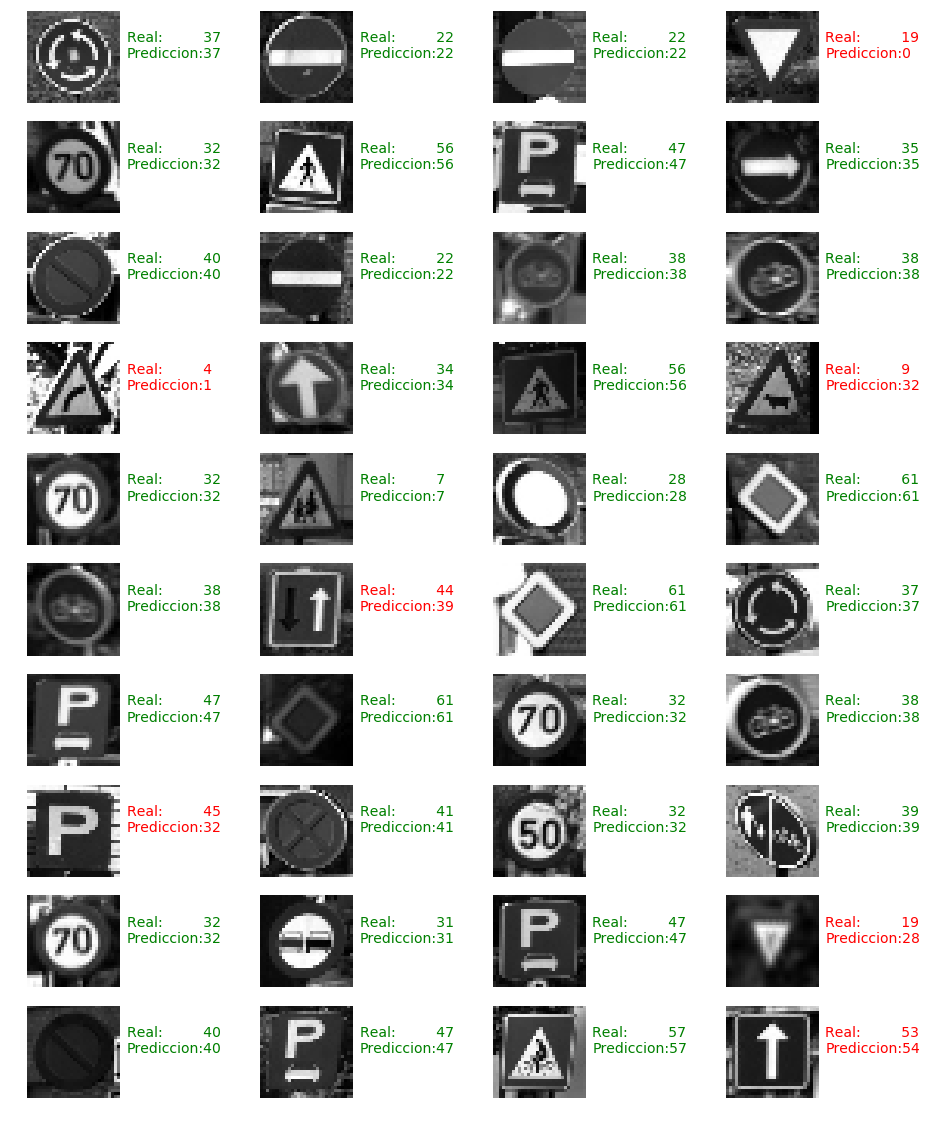

In [45]:
plt.figure(figsize=(16,20))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(10,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:         {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

In [46]:
test_images, test_labels = load_ml_data(test_data_dir)

In [47]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [48]:
test_images30 = rgb2gray(np.array(test_images30))

In [49]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

In [50]:
match_count = sum([int(l0 == lp) for l0, lp in zip(test_labels, prediction)])
match_count

1603

In [51]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: {:.2f}".format(acc))

Eficacia de la red neuronal: 63.61
